"""

@Author: Girish</br>
@Date: 2024-10-04</br>
@Last Modified by: Girish</br>
@Last Modified time: 2024-10-04</br>
@Title: Based on bank customer data, predicted whether cutomer will subscribe to
term deposit or not using KNN</br>

"""

Based on bank customer data, predicted whether cutomer will subscribe to
term deposit or not.


        Importing required modules

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

        Reading Dataset

In [3]:
df = pd.read_csv("bank.csv",sep= ';')
df


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


        Discriptive Statistics of Dataset

In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


        Check for Null Values

In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

        Outliers Handling

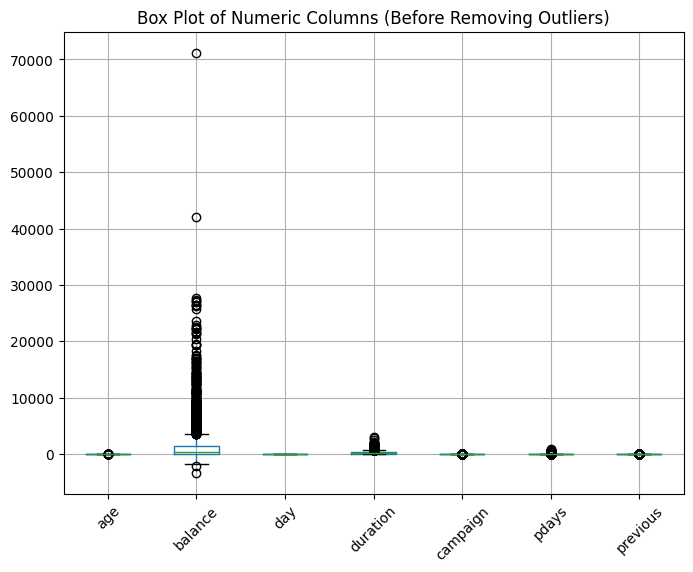

In [6]:
numeric_columns = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays','previous']

# Initial box plot to visualize outliers
plt.figure(figsize=(8, 6))
df[numeric_columns].boxplot()
plt.title('Box Plot of Numeric Columns (Before Removing Outliers)')
plt.xticks(rotation=45)
plt.show()


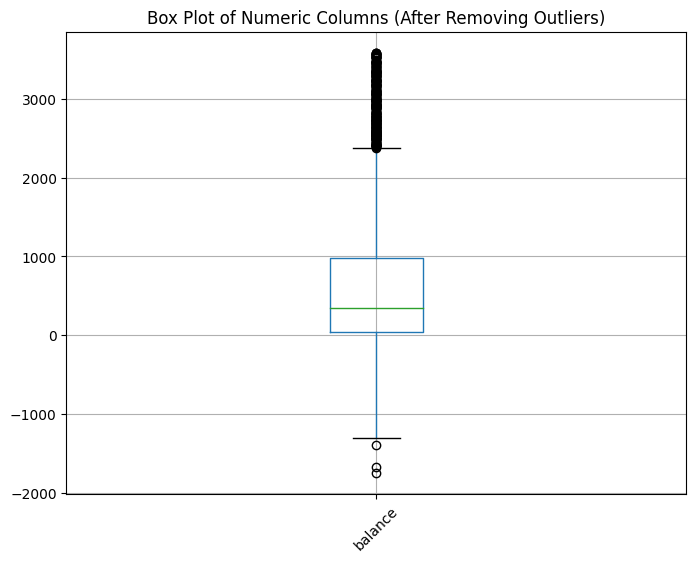

In [7]:
numeric_columns = ['balance']
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1


df = df[~((df[numeric_columns] < (Q1 - 1.5 * IQR)) | (df[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
plt.figure(figsize=(8,6))
df[numeric_columns].boxplot()
plt.title('Box Plot of Numeric Columns (After Removing Outliers)')
plt.xticks(rotation=45)
plt.show()

        Label Encoding

In [8]:
label_encoder = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
     df.loc[:, column] = label_encoder.fit_transform(df.loc[:, column])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,19,10,79,1,-1,0,3,0
2,35,4,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,3,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,8,226,1,-1,0,3,0
5,35,4,2,2,0,747,0,0,0,23,3,141,2,176,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,32,7,2,1,0,473,1,0,0,7,5,624,5,-1,0,3,0
4516,33,7,1,1,0,-333,1,0,0,30,5,329,5,-1,0,3,0
4518,57,9,1,1,0,295,0,0,0,19,1,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,6,3,129,4,211,3,1,0


        Feature Scaling

In [9]:
scaler=StandardScaler()
numeric_columns = ['age','job','marital','education','default','balance','housing','loan','contact','day','month','duration','campaign','pdays','previous','poutcome']
df.loc[:, numeric_columns] = scaler.fit_transform(df.loc[:, numeric_columns])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,-1.049327,1.707891,-0.241453,-1.642511,-0.137029,1.312269,-1.159832,-0.435869,-0.723486,0.378297,1.512191,-0.702206,-0.571849,-0.403092,-0.312837,0.439119,0
2,-0.567924,-0.11931,1.418535,1.050295,-0.137029,0.809790,0.862194,-0.435869,-0.723486,0.016405,-1.850932,-0.301566,-0.571849,2.883745,0.286705,-2.604143,0
3,-1.049327,-0.11931,-0.241453,1.050295,-0.137029,0.954670,0.862194,2.294265,1.489693,-1.551794,0.166942,-0.248651,0.387338,-0.403092,-0.312837,0.439119,0
4,1.742811,-1.032911,-0.241453,-0.296108,-0.137029,-0.742489,0.862194,-0.435869,1.489693,-1.310533,0.839566,-0.146601,-0.571849,-0.403092,-0.312837,0.439119,0
5,-0.567924,-0.11931,1.418535,1.050295,-0.137029,0.116439,-1.159832,-0.435869,-0.723486,0.860819,-0.841995,-0.467869,-0.252120,1.354522,1.485788,-2.604143,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4515,-0.856765,0.794291,1.418535,-0.296108,-0.137029,-0.198616,0.862194,-0.435869,-0.723486,-1.069271,-0.169371,1.357689,0.707067,-0.403092,-0.312837,0.439119,0
4516,-0.760485,0.794291,-0.241453,-0.296108,-0.137029,-1.125385,0.862194,-0.435869,-0.723486,1.705234,-0.169371,0.242700,0.707067,-0.403092,-0.312837,0.439119,0
4518,1.550250,1.403358,-0.241453,-0.296108,-0.137029,-0.403287,-1.159832,-0.435869,-0.723486,0.378297,-1.51462,-0.430073,2.625441,-0.403092,-0.312837,0.439119,0
4519,-1.241888,-1.032911,-0.241453,-0.296108,-0.137029,0.564875,-1.159832,-0.435869,-0.723486,-1.189902,-0.841995,-0.513225,0.387338,1.702073,1.485788,-1.589722,0


        Correlation Heat map

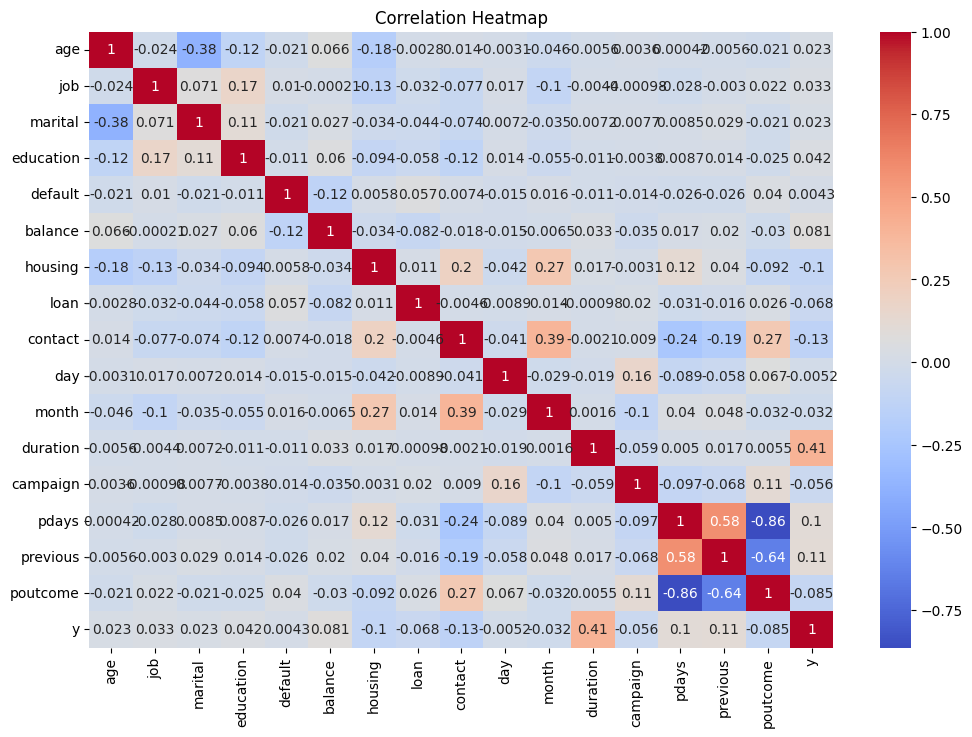

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

        Splitting the Data into Features and Target

In [21]:
X = df.drop('y', axis=1)
df['y'] = df['y'].astype(int)
y = df['y']
y


C:\Users\Girish Nekar\AppData\Local\Temp\ipykernel_1592\3582140823.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = df['y'].astype(int)


0       0
2       0
3       0
4       0
5       0
       ..
4515    0
4516    0
4518    0
4519    0
4520    0
Name: y, Length: 4015, dtype: int32

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        Training the model

In [23]:
knn_model = KNeighborsClassifier(n_neighbors=5)  
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
# Make predictions on the test set
y_pred = knn_model.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 0]


        Confusion Matrix

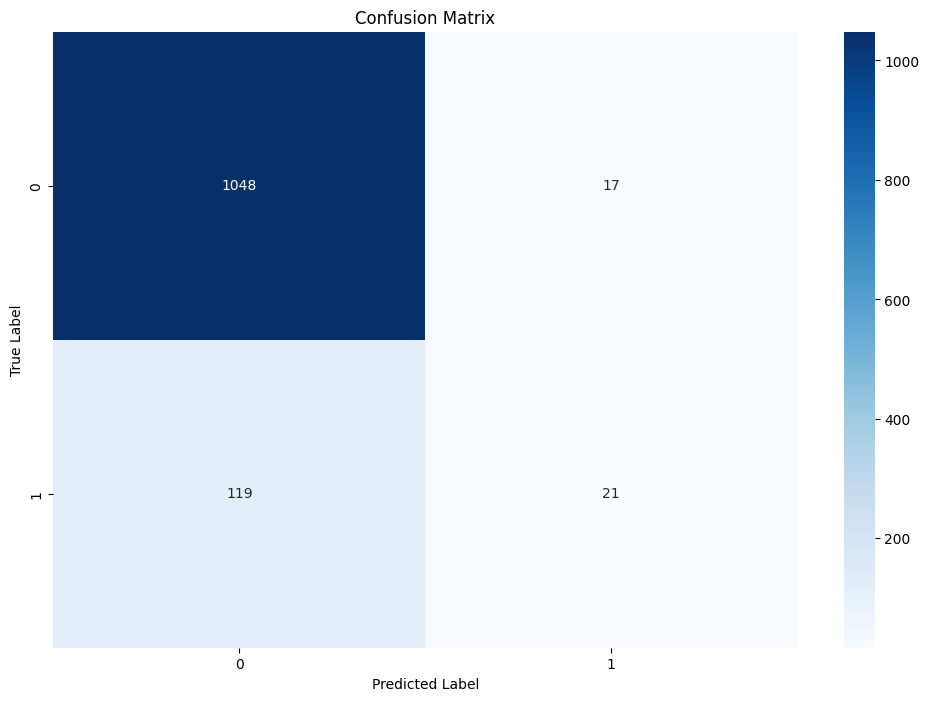

In [25]:

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=knn_model.classes_, 
            yticklabels=knn_model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1065
           1       0.55      0.15      0.24       140

    accuracy                           0.89      1205
   macro avg       0.73      0.57      0.59      1205
weighted avg       0.86      0.89      0.86      1205



        ROC curve

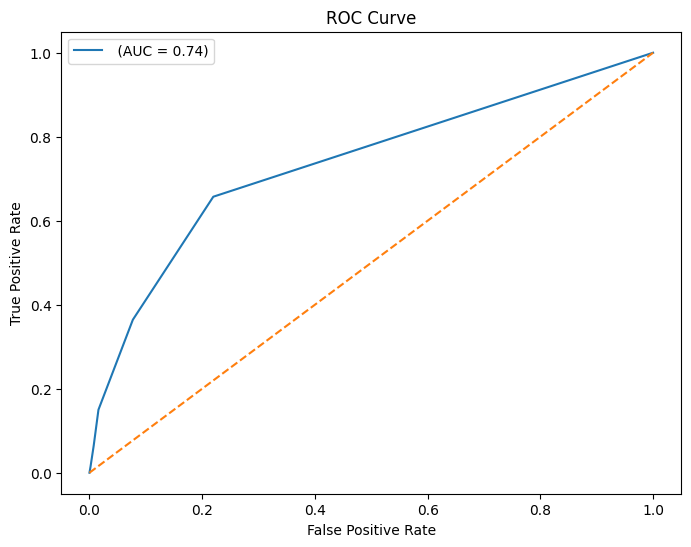

In [27]:
y_pred_proba = knn_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f' (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()